<span>
<b>Author:</b> <a href="http://about.giuliorossetti.net">Giulio Rossetti</a><br/>
<b>Python version:</b>  3.7<br/>
<b>Networkx version:</b>  2.x<br/>
<b>Last update:</b> 18/03/2020
</span>

<a id='top'></a>
# *Chapter 3: Random Networks*

``Networkx`` is a python library designed to provide support to analysis of complex networks.

In this notebook are introduced some of the main features of the library and an overview of its functionalities.

**Note:** this notebook is purposely not 100% comprehensive, it only discusses the basic things you need to get started. <br/> A complete documentation (and tutorial) is available on the project [website](https://networkx.github.io/documentation/latest/)


## Importing the library
As a first step just import the ``networkx`` library.

In [2]:
import networkx as nx
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import powerlaw
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline 

## Synthetic Networks 
``networkx`` allows to generate synthetic network datasets. 

## 1. Erdos-Renyi (random) graphs

A random graph is a graph of N nodes where each pair of nodes is connected by probability p.

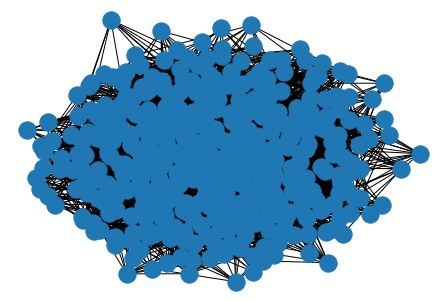

In [22]:
# network generators 1 (random graphs)
er = nx.erdos_renyi_graph(400, 0.05)
nx.draw(er)

ER degree distribution

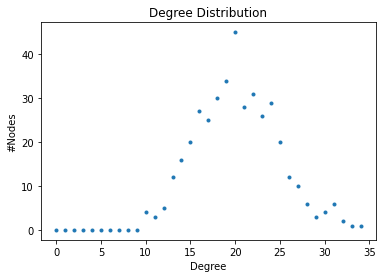

In [23]:
hist = nx.degree_histogram(er)
    
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.show()

### ER regimes

**Subcritical** regime <k> < 1, p < pc=1/N

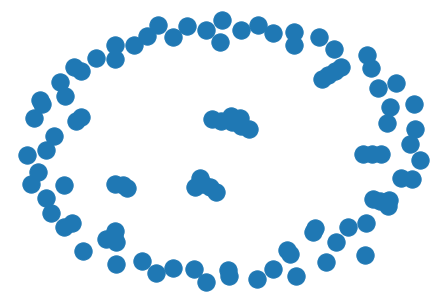

In [40]:
er = nx.erdos_renyi_graph(100, 0.005)
nx.draw(er)

**Critical** regime <k> = 1, p=pc=1/N

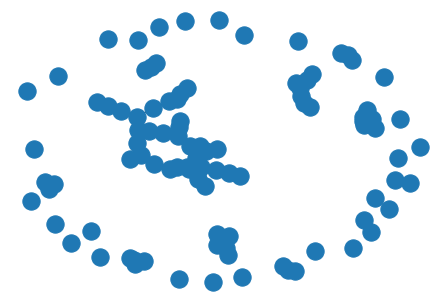

In [41]:
er = nx.erdos_renyi_graph(100, 0.01)
nx.draw(er)

**Supercritical** regime (<k> > 1, p > pc=1/N )

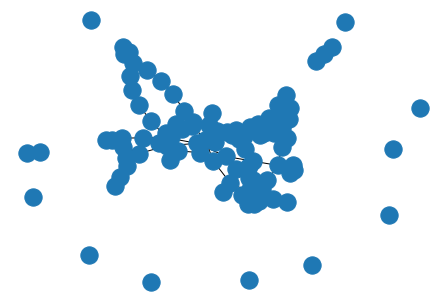

In [43]:
er = nx.erdos_renyi_graph(100, 0.02)
nx.draw(er)

**Connected** regime (<k> > ln N, p > (ln N)/N) 

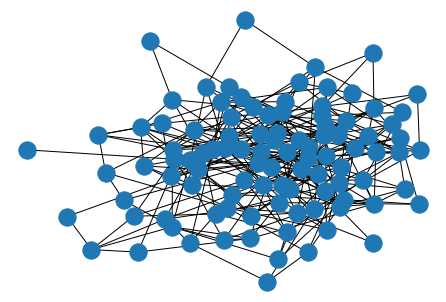

In [46]:
er = nx.erdos_renyi_graph(100, 0.06)
nx.draw(er)

## 2. Configuration Model

How many observed patterns are driven by degree distribution alone?

In [26]:
g = nx.read_edgelist("data/network.csv", delimiter=",", nodetype=int)

In [28]:
# fitting the degree distribution of the real graph
sequence = [i[1] for i in g.degree()]

cm = nx.configuration_model(sequence)

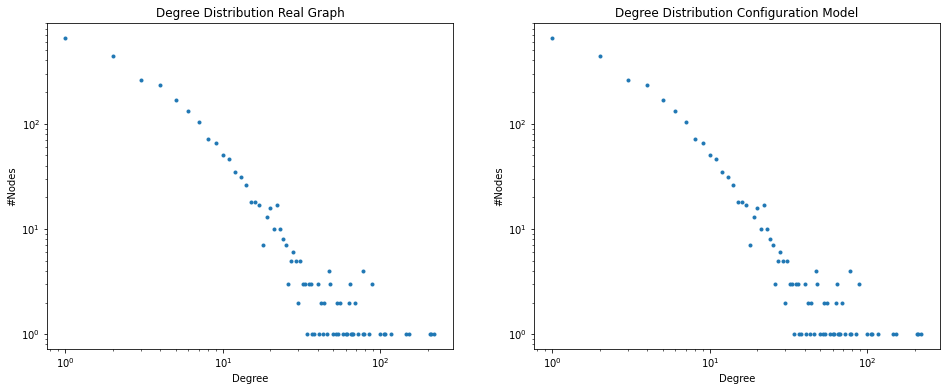

In [37]:
hist_o = nx.degree_histogram(g)
hist = nx.degree_histogram(cm)

fig = plt.figure(figsize=(16, 6)) 
plt.subplot(1, 2, 1)
plt.plot(range(0, len(hist_o)), hist_o, ".")
plt.title("Degree Distribution Real Graph")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()

plt.subplot(1, 2, 2)
plt.plot(range(0, len(hist)), hist, ".")
plt.title("Degree Distribution Configuration Model")
plt.xlabel("Degree")
plt.ylabel("#Nodes")
plt.loglog()
plt.show()